## Create water mask for later training the model
To generate the ground truth images we use the <code>create_gt</code> module. An example of the floodmap image retrieved for the flood in Sardinia, is shown. 

In [14]:
# Path based modules to allow us to save files to our local machine
from pyprojroot import here
import sys
import os
root = here(project_files=[".here"])
sys.path.append(str(here()))

import numpy as np
from datetime import timedelta
from datetime import datetime
import geopandas as gpd
import pandas as pd
import ee
import geemap.eefolium as geemap
import folium
from src.data import ee_download
from src.data.copernicusEMS import activations
from rasterio.plot import show as rasterio_show

from src.data import create_gt

In [17]:
filename = "preingest/S2/sardinia.tif"
bucket_name= "ml4floods"
image_name = f"gs://{bucket_name}/{filename}"

floodmap_geojson = "floodmap.geojson"
geojson_filepath = f"{root}/datasets/Copernicus_EMS_raw/{floodmap_geojson}"
floodmap = gpd.read_file(geojson_filepath)

water_mask = create_gt.compute_water(image_name, floodmap, keep_streams=True)

In [18]:
water_mask.shape,np.unique(water_mask)

((384, 1012), array([-1,  0,  1,  2], dtype=int16))

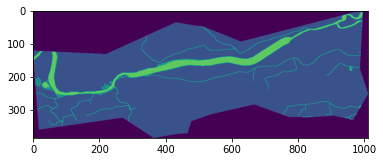

<AxesSubplot:>

In [19]:
rasterio_show(water_mask,vmin=-1, vmax=3)